In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from mlgan.generator.run import run as build_generator
from mlgan.core import preprocessing, postprocessing, data_sources

C:\Users\nitha\Anaconda3\envs\AIArch\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
from pathlib import Path
import random
import logging

import numpy as np
import cv2
import ast
import matplotlib.pyplot as plt

In [6]:
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(module)s - %(message)s"
)

In [7]:
input_images = Path('../data/images/complete_floorplan/input/')

In [8]:
config_generator = data_sources.load_yaml(Path("../config/generator/complete_floorplan.yaml"))
config_generator['settings']['input_shape'] = ast.literal_eval(config_generator['settings']['input_shape'])

2023-06-04 10:52:54,665 - INFO - yaml_files - Loading yaml file from ..\config\generator\complete_floorplan.yaml.


In [ ]:
generator = build_generator(config_generator)

2023-06-04 10:52:56,489 - INFO - BaseGenerator - Loading model for category: single_floor.
2023-06-04 10:52:56,643 - WARNING - normalizations - The given value for groups will be overwritten.
2023-06-04 10:52:56,652 - WARNING - normalizations - The given value for groups will be overwritten.
2023-06-04 10:52:56,659 - WARNING - normalizations - The given value for groups will be overwritten.
2023-06-04 10:52:56,666 - WARNING - normalizations - The given value for groups will be overwritten.
2023-06-04 10:52:56,674 - WARNING - normalizations - The given value for groups will be overwritten.
2023-06-04 10:52:56,684 - WARNING - normalizations - The given value for groups will be overwritten.
2023-06-04 10:52:56,692 - WARNING - normalizations - The given value for groups will be overwritten.
2023-06-04 10:52:56,698 - WARNING - normalizations - The given value for groups will be overwritten.
2023-06-04 10:52:56,706 - WARNING - normalizations - The given value for groups will be overwritten.


In [ ]:
input_images_list = [x for x in input_images.glob('*.png')]
len(input_images_list)

In [10]:
random_file = random.choice(input_images_list)

input_image = cv2.imread(str(random_file))
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

predictions = generator.predict(input_image, 5)
# generator.visualize_predictions(input_image, predictions=predictions);

1/1 [==============================] - 0s 350ms/step


In [11]:

preprocessed_img = generator.preprocess_image(input_image)

In [12]:
preprocessed_img = (preprocessed_img * 0.5) + 0.5

In [13]:
n_predictions = len(predictions.keys())

In [14]:
n_predictions

5

In [ ]:
int(np.ceil((n_predictions + 1) / 3))

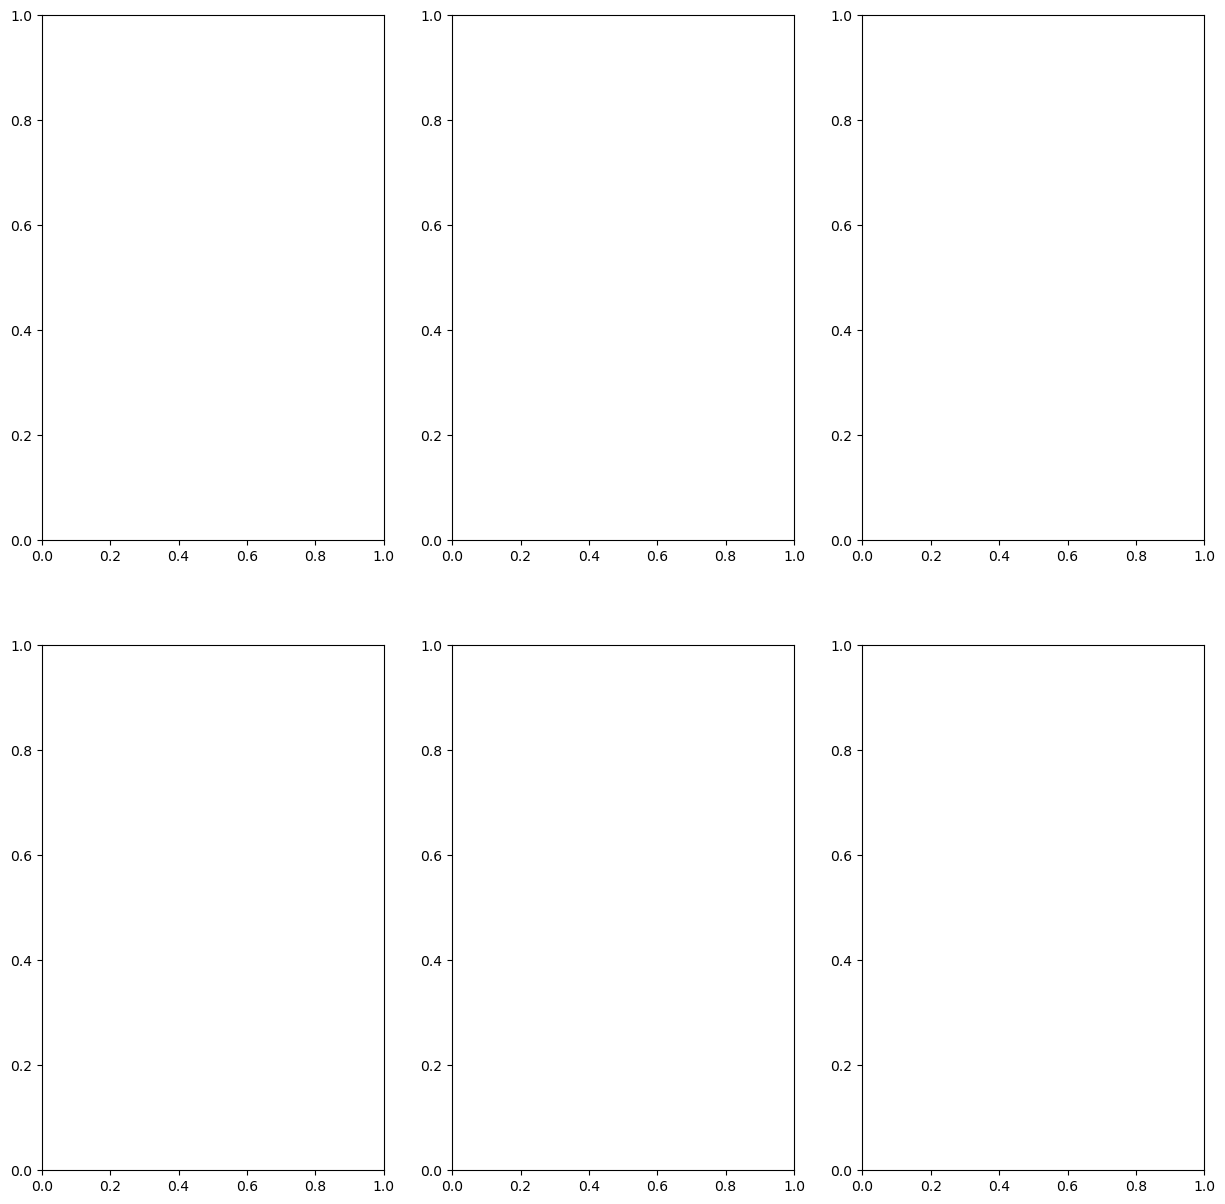

In [5]:
fig, axes =  plt.subplots(
    figsize=(15, 3 * 5),
    nrows=2,
    ncols=3,
)

In [1]:
input_results = [preprocessed_img] + list(predictions.values())

NameError: name 'preprocessed_img' is not defined

In [ ]:
input_results = [preprocessed_img] + list(predictions.values())
titles = ["input"] + [
    f"{comb[0]}_{comb[1]}" for comb in list(predictions.keys())
]

i = 0
for title, img, ax in zip(titles, input_results, axes.flatten()):
    # plt.subplot(ax)
    plt.title(f"{i}_{title}", fontweight="bold")
    plt.imshow(img)
    plt.axis("off")
    i += 1

for ax in axes.flatten():
    # plt.subplot(ax)
    plt.axis("off")
plt.tight_layout()
